In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
teams=pd.read_csv("teams.csv")

In [3]:
teams.head()


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [4]:
numeric_teams = teams.select_dtypes(include=[float, int])
correlation_matrix = numeric_teams.corr()
medals_correlation = correlation_matrix["medals"]
print(medals_correlation)

year            -0.021603
events           0.771330
athletes         0.840817
age              0.025096
height           0.141055
weight           0.090577
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
Name: medals, dtype: float64


In [5]:
teams=teams[["team","country","year","athletes","age","prev_medals","medals"]]

In [6]:
teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


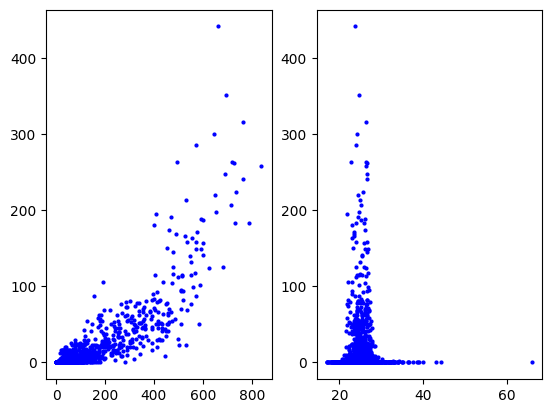

In [7]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(teams["athletes"],teams["medals"],"bo", markersize="2")
axs[1].plot(teams["age"],teams["medals"],"bo", markersize="2")
plt.show()

In [8]:
teams=teams.dropna()
teams


,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [9]:
train=teams[teams["year"]<2012]
test=teams[teams["year"]>=2012]


In [10]:
test.shape

(405, 7)

In [11]:
train.shape

(1609, 7)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg=LinearRegression()

In [14]:
predictors=["athletes", "age"]
output="medals"

In [15]:
reg.fit(train[predictors],train[output])

LinearRegression()

In [16]:
LinearRegression()

LinearRegression()

In [17]:
test_predictions=reg.predict(test[predictors])

In [18]:
print(reg.score(test[predictors],test[output]))

0.8107158864601444


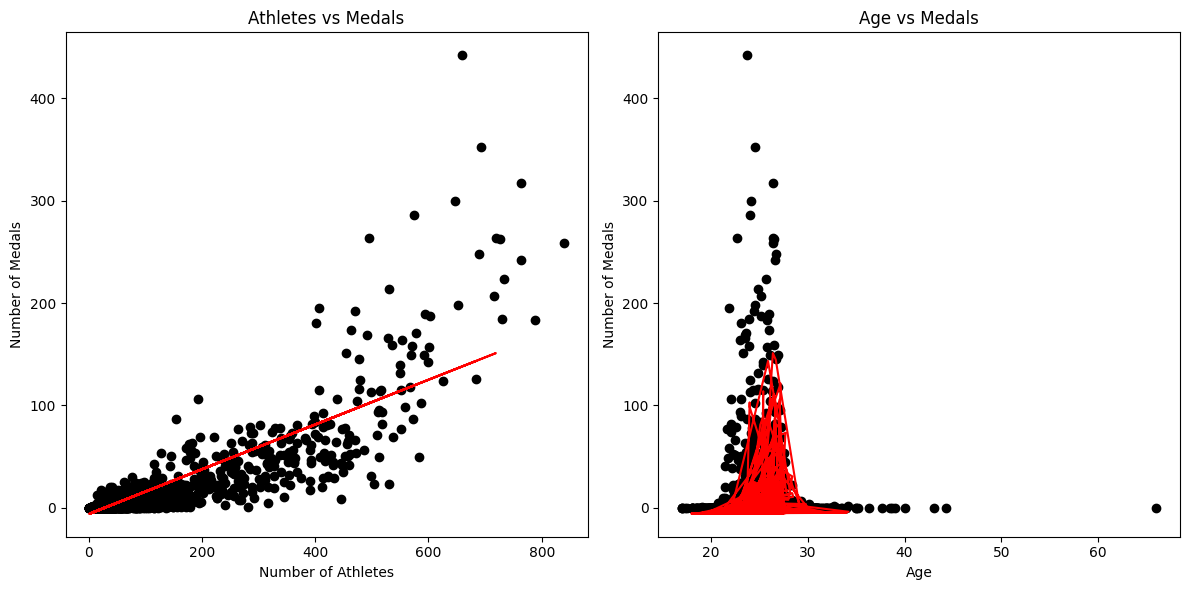

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Athletes vs Medals
axs[0].scatter(teams["athletes"], teams[output], color='black')
axs[0].plot(test['athletes'], test_predictions, color='red')
axs[0].set_title('Athletes vs Medals')
axs[0].set_xlabel('Number of Athletes')
axs[0].set_ylabel('Number of Medals')

# Second subplot: Age vs Medals
axs[1].scatter(teams["age"], teams[output], color='black')
axs[1].plot(test['age'], test_predictions, color='red')
axs[1].set_title('Age vs Medals')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Number of Medals')

plt.tight_layout()
plt.show()

In [60]:
X_train = train[['athletes', 'age']]
y_train = train['medals']
X_test = test[['athletes', 'age']]
y_test = test['medals']

In [69]:
degree = 4
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [70]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [71]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
print('Train MSE:', mean_squared_error(y_train, y_train_pred))
print('Test MSE:', mean_squared_error(y_test, y_test_pred))
print('Train R2:', r2_score(y_train, y_train_pred))
print('Test R2:', r2_score(y_test, y_test_pred))

Train MSE: 238.86854059219158
Test MSE: 106.28855966242989
Train R2: 0.8018888603349571
Test R2: 0.8717187475681054


C:\Users\austi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\austi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


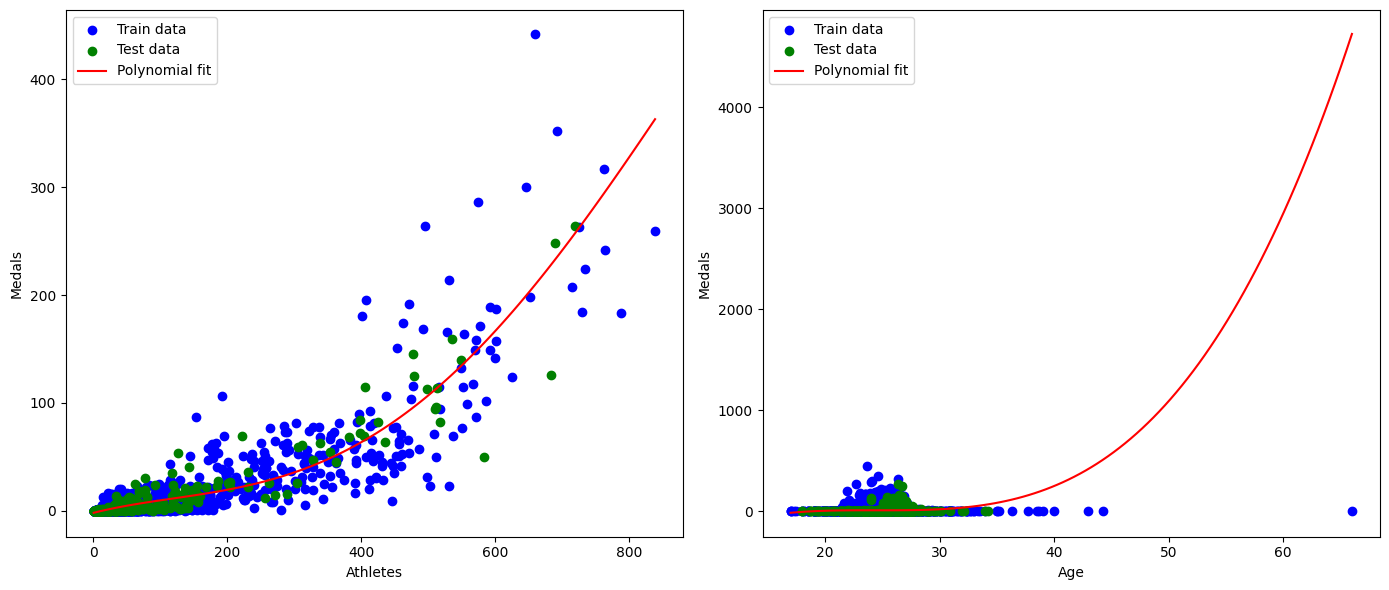

In [82]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


athletes_range = np.linspace(X_train['athletes'].min(), X_train['athletes'].max(), 100).reshape(-1, 1)
age_mean = X_train['age'].mean()  # Mean value of age
athletes_range_with_age = np.hstack((athletes_range, np.full_like(athletes_range, age_mean)))
athletes_poly = poly.transform(athletes_range_with_age)
athletes_pred = model.predict(athletes_poly)
axes[0].scatter(X_train['athletes'], y_train, color='blue', label='Train data')
axes[0].scatter(X_test['athletes'], y_test, color='green', label='Test data')
axes[0].plot(athletes_range, athletes_pred, color='red', label='Polynomial fit')
axes[0].set_xlabel('Athletes')
axes[0].set_ylabel('Medals')
axes[0].legend()


age_range = np.linspace(X_train['age'].min(), X_train['age'].max(), 100).reshape(-1, 1)
athletes_mean = X_train['athletes'].mean()  # Mean value of athletes
age_range_with_athletes = np.hstack((np.full_like(age_range, athletes_mean), age_range))
age_poly = poly.transform(age_range_with_athletes)
age_pred = model.predict(age_poly)
axes[1].scatter(X_train['age'], y_train, color='blue', label='Train data')
axes[1].scatter(X_test['age'], y_test, color='green', label='Test data')
axes[1].plot(age_range, age_pred, color='red', label='Polynomial fit')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Medals')
axes[1].legend()

plt.tight_layout()
plt.show()